# Imposed Displacements
<center>![](trab02_conv.svg)</center>
The dynamic system in figure is composed of two uniform beams of
negligible mass, their flexural stiffness being $EJ=\text{const}$,
supporting a lumped mass of negligible rotatory inertia (the
flexibility matrix is $\boldsymbol F=\frac{L^3}{6EJ}
\begin{bmatrix}3&2\\2&96\end{bmatrix}$).

The left support is subjected to an imposed horizontal displacement
that varies between $0$ and $\Delta$
\begin{equation*}
  u_\mathcal{A} = \Delta
  \begin{cases}
    \frac{20 \tau^3 - 15 \tau^4 + 3 \tau^5}{16} & \text{for }
    0\le\tau\le2,\\
    1&\text{for }\tau>2,
  \end{cases}
\end{equation*}
where $\tau=\omega_0t$ and $\omega_0^2=\frac{EJ}{mL^3}$.

Plot the _total_ vertical displacement of the mass in the time interval $0\le\tau\le10$.

## Solution

We are going to

 - determine the structural matrices for the 2 DoF dynamic system,
 - compute its eigenvalues and its eigenvectors,
 - determine the pseudo-static mass motion when the support is displaced
 - write the EoM for the inertial forces due to the support motion,
 - determine the particular integrals and the homogeneous solution first, and next the frre vibrations,
 - present our results.

### Structural Matrices

Because the text of the problem gives us $\boldsymbol F$, we can easily compute $\boldsymbol K$ by inversion of the flexibility; the mass matrix is super easy... $\boldsymbol M = m \boldsymbol I$

In [11]:
F = array(((3., 2.), (2., 96.)))/6
K = array(((96., -2.), (-2., 3)))*6/(96*3-2*2)
M = array(((1., 0.), (0., 1.)))

### Eigenvalues, eigenvectors, frequencies

Next we compute the eigenvalues and the eigenvectors

In [12]:
l2, Psi = eigh(K, M)
l1 = sqrt(l2)
L2 = diag(l2) ; L1 = sqrt(L2)

#### The structural matrices, the eigen* and the frequencies

In [13]:
Psi[:,0] *= -1 # change sign to the first column
dL(r'\begin{align}',
   r'\boldsymbol M &= m\,', prmat(M), r',\\',
   r'\\',
   r'\boldsymbol F &= \frac{L^3}{6EJ}\,', prmat(6*F), ',&',
   r'\boldsymbol K &= \frac{3EJ}{142L^3}\,', prmat(142*K/3), r',\\',
   r'\\',
   r'\boldsymbol \Lambda^2 &=', prmat(L2), ',&',
   r'\boldsymbol \Lambda &=', prmat(L1), r',\\',
   r'\\',
   r'\boldsymbol \Psi &=', prmat(Psi), '.',
   r'\end{align}')

<IPython.core.display.Latex object>

### Kinematics of the Problem
Starting from the imposed displacement of the left node we compute also its velocity and its acceleration,
next we analyze the effects of a static displacement on the position of the supported mass.

#### The node displacement and its derivatives
We use a _polynomial class_ to represent the displacement of $\mathcal A$ (the coefficients must be given in descending order).  The class supports evaluation and derivation (and other things that we are not going to use). 

In [14]:
d = p(3, -15, 20, 0, 0, 0)/16
v = d.deriv()
a = v.deriv()

In [15]:
dL('\\begin{align}',
       r"x_\mathcal{A} &= ", ltx_p(d), r',\\',
       r"\frac{dx_\mathcal{A}}{d\tau} = x'_\mathcal{A} &= ", ltx_p(v), r',\\',
       r"\frac{d^2x_\mathcal{A}}{d\tau^2} = x''_\mathcal{A} &= ", ltx_p(a),
       r'=\frac{15}{4}\,\left(', ltx_p(p(1,-3,2,0)), r'\right).'
   '\\end{align}')

<IPython.core.display.Latex object>

#### The influence matrix

The  displacement of the supported mass is analyzed degrading the $\mathcal{A}$ hinge to a roller: the structure is hence a rigid system with 1 DoF and the CIR of the left-top bar is on the vertical of the roller and on the line joining the two hinges.
<center>![](trab04_conv.svg)</center>
For $x_\mathcal{A}=1$ we have $x_1=1/2$ and $x_2=2$, hence $E=\begin{Bmatrix}1/2&2\end{Bmatrix}^T$. The modal load is $\boldsymbol{p}^\star=-\boldsymbol\Psi^T\,\boldsymbol{M}\,\boldsymbol{E}\,\ddot{x}_\mathcal{A}
=-m\boldsymbol\Psi^T\,\boldsymbol{E}\,\ddot{x}_\mathcal{A}
=m\boldsymbol\Gamma\,\ddot{x}_\mathcal{A}$
where $\boldsymbol\Gamma = -\boldsymbol\Psi^T\,\boldsymbol{E}$.

In [16]:
E = array((0.5, 2.0))
G = -Psi.T@E

In [17]:
dL(r'$$\boldsymbol E=', prmat(E[:,None], type='B'), r',\qquad',
   r'\boldsymbol\Gamma=', prmat(G[:,None], type='B'),'.$$')

<IPython.core.display.Latex object>

##### Plots of displacement, velocity and acceleration of the node
... against a dimensionless time that runs from `0` to `2` (note the normalization factors, especially the ones for velocity and acceleration).

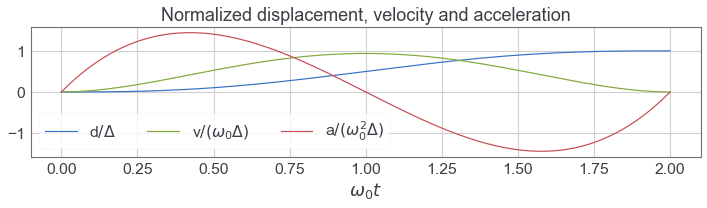

In [18]:
t02 = linspace(0,2,201)
plt.plot(t02, d(t02), label=r'd${}/\Delta$')
plt.plot(t02, v(t02), label=r'v${}/(\omega_0\Delta)$')
plt.plot(t02, a(t02), label=r'a${}/(\omega_0^2\Delta)$')
plt_labels(xl='$\\omega_0t$', c=3,
           t='Normalized displacement, velocity and acceleration')

### Dynamic Response

1. We write the EoM with reference to the dimensionless time $\tau = \omega_0t$,
2. we find the particular integral that satisfies the EoM when the mass is subjected to the _static acceleration_,
3. the forced modal responses are determined imposing the initial conditions for $\tau=0$ and
4. eventually we determine the free response, this time imposing that the displacement and the velocity of the forced and the free responses are equal for $\tau=2$ .

#### The modal EoM with respect to dimensionless time
The equation of motion is $\boldsymbol M \ddot{\boldsymbol x} + \boldsymbol K \boldsymbol x = - \boldsymbol M \boldsymbol E \ddot x_\mathcal{A}$.

If we denote with primes the derivative with respect to $\tau=\omega_0t$, it is $\dot f = \omega_0 f'$ and the equation of motion is
$$
  \omega_0^2\boldsymbol M \boldsymbol x'' + \boldsymbol K \boldsymbol x =
- \omega_0^2\boldsymbol M \boldsymbol E x''_\mathcal{A}.
$$

Applying the modal transformation, with $\boldsymbol M^\star=\boldsymbol M=m\boldsymbol I$ (that implies that 
$\boldsymbol M\boldsymbol E = m\boldsymbol E$)
$$
    m\omega_0^2\boldsymbol q'' + m\omega_0^2\boldsymbol \Lambda^2 \boldsymbol q =
  - m\omega_0^2\boldsymbol\Psi^T \boldsymbol E x''_\mathcal{A}
$$
and, simplifying $m\omega_0^2$ and developing the right member
$$
  \boldsymbol q'' + \boldsymbol \Lambda^2 \boldsymbol q =
- \boldsymbol\Psi^T \boldsymbol E x''_\mathcal{A} = 
  \frac{15}{4}\boldsymbol\Gamma(\tau^3-3\tau^2+2\tau),
  \qquad\text{where } \boldsymbol\Gamma = -\boldsymbol\Psi^T\boldsymbol{E}.
$$

#### Particular Integral
A particular integral (omitting the indices) is $\xi(\tau) = P\tau^3 + Q\tau^2+R\tau+S$. With the provision that we have to multiply our results by $15\boldsymbol\Gamma/4$ we can write
$$
  6P\tau + 2Q + \lambda^2\left(P\tau^3 + Q\tau^2+R\tau+S\right) = \tau^3 -3\tau^2+2\tau.
$$
Equating for each power of $\tau$ the coefficients on both sides, we have
$$
  \lambda^2P=1,\qquad \lambda^2Q=-3,\qquad 6P+\lambda^2R=2,\qquad 2Q+\lambda^2S=0
$$
a set of equations that can be readily translated to code (taking also into account the multiplication by $15\gamma_i/4$).

In [19]:
P = 1/l2 ; Q = -3/l2 ; R = (2-6*P)/l2 ; S = (0-2*Q)/l2
P, Q, R, S = map(lambda coeff: 3.75*coeff*G, (P, Q, R, S))
xi = [p(P[i], Q[i], R[i], S[i]) for i in (0, 1)]

In [20]:
dL(r'\begin{align}',
   r'\\'.join(r'\xi_{%d} &= %s'%(i,ltx_p(xi_i)) for i, xi_i in enumerate(xi, 1)),
   r'\end{align}')

<IPython.core.display.Latex object>

#### Modal Responses, Forced Phase
It is $q_i(\tau)=A_i\cos\lambda_i\tau + B_i\sin\lambda_i\tau + \xi_i(0)$; the $\xi$ have been determined, we have to determine the constants of integration $A$ and $B$ imposing that $\boldsymbol q(0) = \boldsymbol 0$ and $\boldsymbol q'(0) = \boldsymbol 0$: it is $A_i=-\xi_i(0)$ and $\lambda_iB_i=-\xi_i'(0)$.

In [21]:
xi0 = array([Xi(0) for Xi in xi])          ; A = -xi0
dxi0 = array([Xi.deriv()(0) for Xi in xi]) ; B = -dxi0/l1

##### Plot of the forced modal responses
We compute first the 2D array `l1t1`, that has $\lambda_i\omega_0t$ in its two columns, next the modal response `q02` because it's the first phase of the response for $0\le\tau\le2$...

In [31]:
l1t02 = outer(t02, l1)
q02 = A*cos(l1t02) + B*sin(l1t02) + array([Xi(t02) for Xi in xi]).T
dq02 = -A*l1*sin(l1t02) + B*l1*cos(l1t02) + array([Xi.deriv()(t02) for Xi in xi]).T

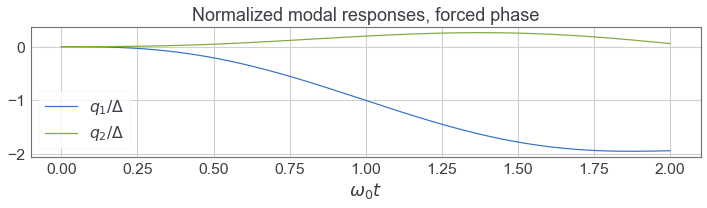

In [32]:
plt.legend(plt.plot(t02, q02), (r'$q_1/\Delta$','$q_2/\Delta$'))
plt_labels(xl='$\\omega_0t$', l=0, t='Normalized modal responses, forced phase')

#### Modal Responses, free phase
The free response starts at `t22=2`, we can impose that the modal displacements and derivatives of the free response, computed at `t22`, are equal to the modal displacements and derivatives for the forced phase. Indicating with a ${}^1$ the quantities relative to the forced phase and with ${}^2$ the ones relative to free response,
$$\begin{bmatrix}\cos\lambda_i\tau_{22} &\sin\lambda_i\tau_{22}\\
-\sin\lambda_i\tau_{22} &\cos\lambda_i\tau_{22}\end{bmatrix}
\begin{Bmatrix}{}^2A_i\\{}^2B_i\end{Bmatrix} = \begin{Bmatrix}
{}^1q_i(\tau_{22})\\\frac{\displaystyle{{}^1\dot q_i(\tau_{22})}}{\lambda_i}\end{Bmatrix}.
$$
The coefficient matrix is an orthogonal matrix (i.e., $\boldsymbol A^{-1}\equiv\boldsymbol A^T$), so we can write our solution as follows

In [33]:
t22 = 2
C22 = cos(l1*t22)
S22 = sin(l1*t22)
q22 = q1[-1]
dq22_over_l1 = dq1[-1]/l1
Afree = C22*q22-S22*dq22_over_l1
Bfree = S22*q22+C22*dq22_over_l1

It is now possible to compute the modal response in $2\le\tau\le10$, so that we can compute the total displacements of the mass in said interval, as requested by the problem.

In [34]:
t210 = linspace(2.01, 10, 800)
l1t210 = outer(t210, l1)
q210 = Afree*cos(l1t210) + Bfree*sin(l1t210)
dq210 = -l1*Afree*sin(l1t210) + l1*Bfree*cos(l1t210)

### Summing Up and Showing  the Results

Finally we stick together the forced and the free responses, and compute the nodal deformations by post-multiplying the modal responses by the transpose of `Psi` and the static displacement by evaluating the polynomial `d` and taking the outer product with the influence matrix, finally we compute the total displacement of the mass

In [35]:
t = hstack((t02, t210))
q = vstack((q02, q210))
dq = vstack((dq02, dq210))
x = q@Psi.T
xst = outer(where(t<t22,d(t), 1), E)
xtot = xst + x

#### The Plot of the Total Displacements

... normalized with respect to the final support of the displacement.

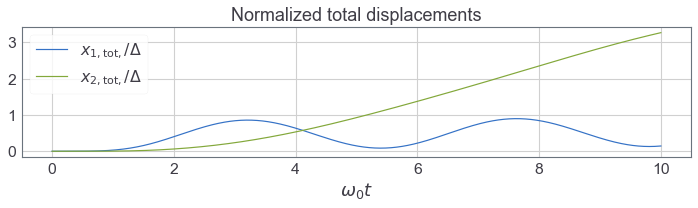

In [36]:
plt.legend(plt.plot(t, xtot), [r'$x_{%d,\mathrm{tot,}}/\Delta$'%i for i in (1,2) ]) 
plt_labels(xl='$\\omega_0t$', t='Normalized total displacements', l=0)

#### The Total Displacements over a Longer Time Span

The requirements of the problem are satisfied, but I'm left with the curiosity of what happens to the vertical displacements in the following... let's plot the total displacements for $0\le\tau\le30$.

In [37]:
t230 = linspace(2.01, 30, 2800)
l1t230 = outer(t230, l1)
q230 = Afree*cos(l1t230) + Bfree*sin(l1t230)
dq230 = -l1*Afree*sin(l1t230) + l1*Bfree*cos(l1t230)

t = hstack((t02, t230))
q = vstack((q02, q230))
dq = vstack((dq02, dq230))
x = q@Psi.T
xst = outer(where(t<t22,d(t), 1), E)
xtot = xst + x

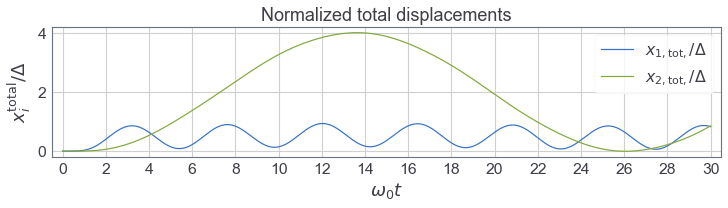

In [38]:
plt.legend(plt.plot(t, xtot), 
           [r'$x_{%d,\mathrm{tot,}}/\Delta$'%i for i in (1,2)])
plt.xlim((-0.5, 30.5))
plt_labels(xl=r'$\omega_0t$', yl=r'$x_i^\mathrm{total}/\Delta$',
           t='Normalized total displacements', xt=range(0, 31,2), l=0)

Quite a sling effect...

## Post Scriptum
 
That's all, except that here I show you the code that is executed at the beginning of the notebook.

There is the initialization of the plotting machinery and the imports, a further initialization of the plotting _style_ and eventually the definition of a number of utility functions.

If you were interested (who knows...) in the gory details of the production of the mathematical displays and the plots,
you can examine [the notebook (code+text) that is the source of this paper](http://nbviewer.jupyter.org/url/boffi.github.io/dati_2018/hw03/2dof.ipynb).

### Initialization, Imports

In [6]:
%matplotlib inline

import numpy as np
from numpy import array, cos, diag, hstack, linspace
from numpy import outer, sin, sqrt, vstack, where
import matplotlib.pyplot as plt
from scipy.linalg import eigh

In [7]:
from jupyterthemes import jtplot
jtplot.style(context='paper', fscale=1.5, figsize=(15, 3))

### Function Definitions

#### An helper funtion for the decoration of plots
The Matplotlib API is a little verbose, this is an attempt to squeeze the typical decoration that is applied to a plot in a single statement

In [8]:
def plt_labels(xl='', yl='', xt='', yt='', t='', l=1, c=1):
    if xl: plt.xlabel(xl)
    if yl: plt.ylabel(yl)
    if xt: plt.xticks(xt)
    if yt: plt.yticks(yt)
    if t:  plt.title(t)
    if l:  plt.legend(ncol=c)

#### Polynomials' stuff

A function to instantiate a library provided polynomial class and a formatter function to prepare the mathematical display of a polynomial.

In [9]:
def p(*coefs):
    from numpy import poly1d
    return poly1d(coefs)

def ltx_p(p, leading_sign=False):
    order = p.order
    coeffs = p.coefficients
    def _fmt(i, c):
        coef = ('%+g' if (i or leading_sign) else '%g') % c
        if c == 1 : coef = '+' if (i or leading_sign) else ''
        if c == -1: coef = '-'
        var  = '{\\tau}' if i < order else ''
        expn = '^{%d}'%(order-i) if i < order-1 else ''
        return coef + ('\\,' if var else '') + var + expn
    return ''.join(_fmt(i, c) for i, c in enumerate(coeffs) if c)

#### Other math stuff

A formatter to prepare the math display of a matrix and the function that is actually used to render the math displays.

In [10]:
def prmat(mat, fmt='%+.6g', type='b'):    
    return (r'\begin{%smatrix}' +
            r'\\'.join('&'.join(fmt%num for num in row) for row in mat) +
            r'\end{%smatrix}')%(type, type)

def dL(*pieces):
    from IPython.display import Latex
    display(Latex(' '.join(pieces)))